In [5]:
from demo_model import SGG_Model
import cv2
import os

import matplotlib.pyplot as plt

config_path = "../checkpoints/VG150/SGDET/penet-yolov10l/config.yml"
dict_path = "../datasets/VG150/VG-SGG-dicts-with-attri.json"
weights_path = "../checkpoints/VG150/SGDET/penet-yolov10l/best_model_epoch_7.pth"

source = "test_custom/"

if '.jpg' in source:
    example_img = source

    img = cv2.imread(example_img)

    model = SGG_Model(config_path, dict_path, weights_path, rel_conf=0.01, box_conf=0.1, show_fps=False)

    img, graph = model.predict(img, visu=True)

    clean_img = model.nice_plot(img, graph)

elif os.path.isdir(source):
    os.makedirs(source + '/results', exist_ok=True)
    model = SGG_Model(config_path, dict_path, weights_path, rel_conf=0.1, box_conf=0.2, show_fps=False)

    for file in os.listdir(source):
        example_img = source + '/' + file

        if '.jpg' not in example_img:
            continue

        img = cv2.imread(example_img)

        img, graph = model.predict(img, visu=True)

        clean_img = model.nice_plot(img, graph)
        # to rgb
        clean_img = cv2.cvtColor(clean_img, cv2.COLOR_BGR2RGB)
        # save to dir
        cv2.imwrite(source + '/results/res_' + file, clean_img)

2024-07-23 09:15:51.552 | INFO     | sgg_benchmark.utils.logger:setup_logger:31 - Using loguru logger with level: INFO
Overriding model.yaml nc=80 with nc=150

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1    137728  ultralytics.nn.modules.block.SCDown          [256, 512, 3, 2]              
  6                  -1  6   8396800  ultr

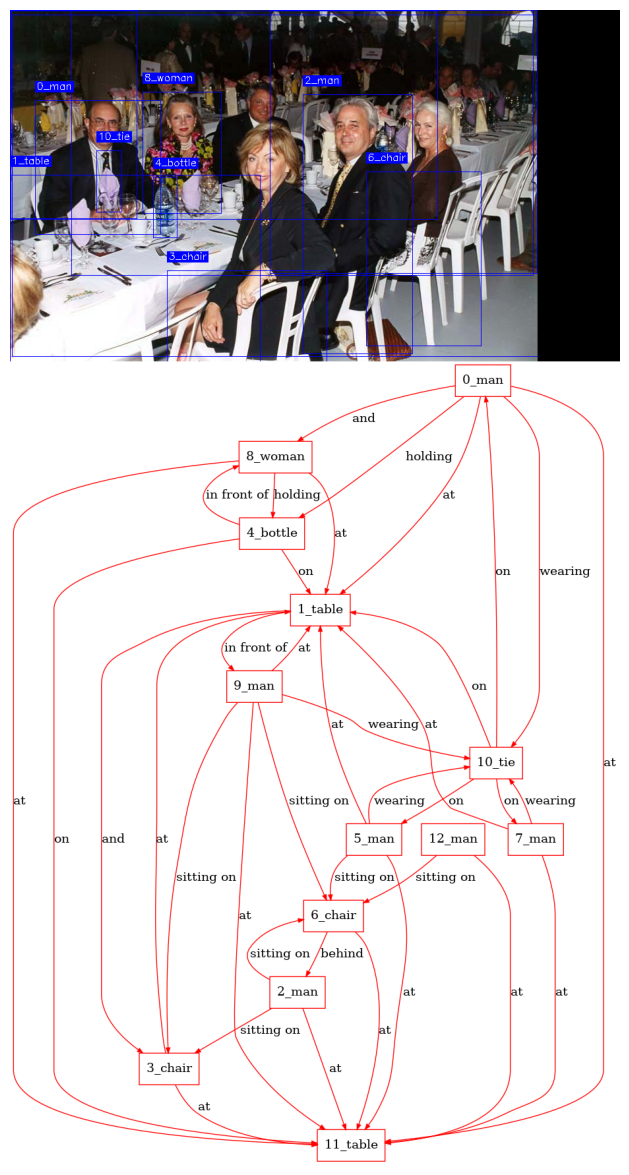

In [6]:
plt.figure(figsize=(15, 15))  # You can adjust the size as needed
plt.imshow(clean_img)
plt.axis('off')
plt.show()